# Rawan Hassan Abu Alkhayr - 4111751

# Import Libraries and Load Data

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Read the CSV file 'AirPassengers.csv'.
AirPassengers = pd.read_csv('AirPassengers.csv', index_col=0, parse_dates=True)
# Remove any rows with missing values.
AirPassengers = AirPassengers.dropna()

- import the necessary libraries for data manipulation, statistical analysis, time series analysis, and visualization. 

- load the 'AirPassengers.csv' file into a Pandas DataFrame, ensuring the dates are parsed as datetime objects.

- remove any rows with missing values.

# Plot the Data

C:\Users\star\AppData\Local\Temp\ipykernel_11300\3046150764.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  AirPassengers = pd.read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


<class 'pandas.core.series.Series'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Series name: #Passengers
Non-Null Count  Dtype
--------------  -----
144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB

Data:
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64


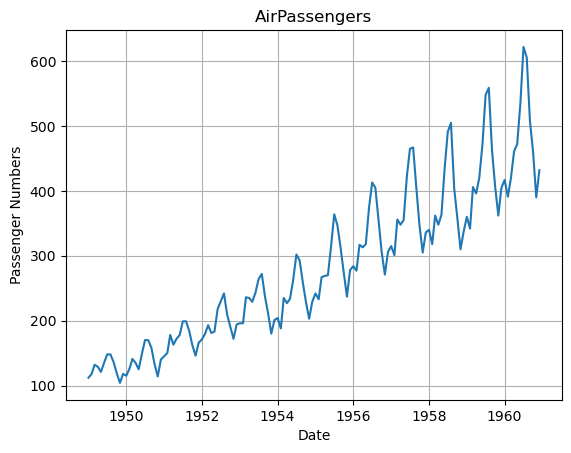

In [8]:
# Load the data and save it into a pandas DataFrame called "AirPassengers"
AirPassengers = pd.read_csv('AirPassengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Data Information
AirPassengers.info()
print("\nData:")
print(AirPassengers)

# Data Visualization
plt.plot(AirPassengers)
plt.title('AirPassengers')
plt.xlabel('Date')
plt.ylabel('Passenger Numbers')
plt.grid(True)
plt.show()

# 1.	Is the series stationary? 

# Check Stationarity

In [2]:
# Perform the Augmented Dickey-Fuller test.
dftest = adfuller(AirPassengers['#Passengers'], autolag='AIC')

# Print the ADF statistic.
print("1. ADF Statistic:", dftest[0])
# Print the p-value.
print("2. P-Value:", dftest[1])
# Print the critical values.
print("5. Critical Values:")
for key, val in dftest[4].items():
    print("\t", key, ":", val)

# Check stationarity
if dftest[1] <= 0.05:
    print("\nThe series is stationary (p-value <= 0.05).")
else:
    print("\nThe series is not stationary (p-value > 0.05).")


1. ADF Statistic: 0.815368879206051
2. P-Value: 0.991880243437641
5. Critical Values:
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598

The series is not stationary (p-value > 0.05).


- perform the Augmented Dickey-Fuller test on the 'Passengers' column of the DataFrame to check for stationarity.

- print the ADF statistic, the p-value, and the critical values.

- interpret the results of the test and print whether the series is stationary or not based on the significance level (0.05)

## In this analysis, the ADF statistic of 0.815 is greater than critical values across all significance levels (1%, 5%, and 10%), indicating a failure to reject the null hypothesis of non-stationarity. Furthermore, the high p-value of approximately 0.992 corroborates this finding, suggesting weak evidence against the null hypothesis. Consequently, the time series exhibits non-stationary behavior, implying that its statistical properties such as mean and variance are not constant over time. This could be indicative of underlying trends, seasonality, or other systematic patterns within the data.

# 2.	Is there any seasonality component?

# Seasonal Decomposition and Visualization

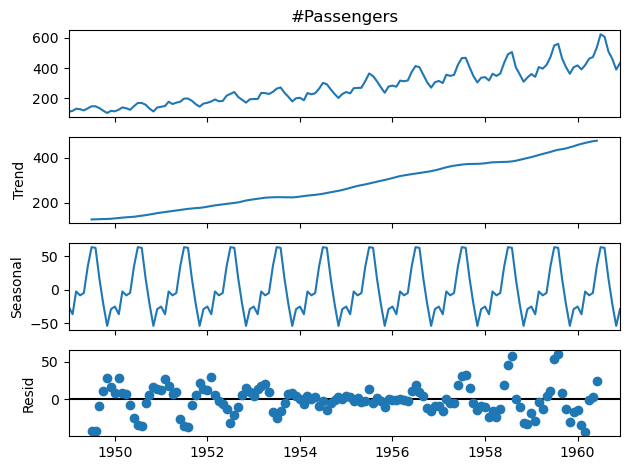

In [3]:
# Perform seasonal decomposition on the AirPassengers series using an additive model.
result = seasonal_decompose(AirPassengers['#Passengers'], model='additive')

# Plot the resulting decomposition.
result.plot()
# Display the plot.
plt.show()

- perform seasonal decomposition on the 'Passengers' column using an additive model.

- plot the resulting decomposition, which shows the trend, seasonal, and residual components of the time series.

## From the plot, we can see that there is a clear seasonal component in the data. We can see that there is a clear pattern of higher values during the summer months and lower values during the winter months.

# 3.	There is a Trend compoenent in the series?

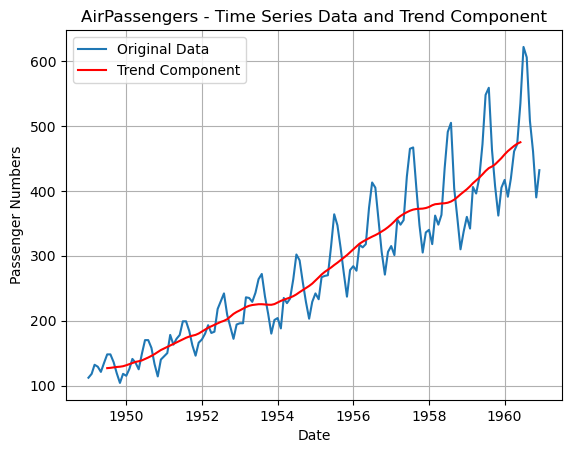

In [11]:

# Perform seasonal decomposition on the AirPassengers series using an additive model
result = seasonal_decompose(AirPassengers, model='additive')

# Plot the original time series data and its trend component
plt.plot(AirPassengers, label='Original Data')
plt.plot(result.trend, label='Trend Component', color='red')
plt.title('AirPassengers - Time Series Data and Trend Component')
plt.xlabel('Date')
plt.ylabel('Passenger Numbers')
plt.legend()
plt.grid(True)
plt.show()

- plot both the original time series data and its trend component on the same plot.

- The original data is plotted in blue, and the trend component is plotted in red.

- The legend indicates which line corresponds to the original data and which one represents the trend component.

## Yes, there is a clear trend component in the data. We can see that the values are increasing over time, which indicates a positive trend.

# Forecasting using ARIMA

In [5]:
# Creating an ARIMA model with specified parameters
model = ARIMA(AirPassengers['#Passengers'], order=(2, 1, 2))
# Fitting the ARIMA model to the data
model = model.fit()

# Forecasting the next 12 months
forecast = model.forecast(steps=12)

# Print the forecasted values for the next 12 months
print("\nForecasted Passenger Numbers for Next 12 Months:")
print(forecast)

C:\Users\star\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\star\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\star\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Forecasted Passenger Numbers for Next 12 Months:
1961-01-01    439.854593
1961-02-01    465.296195
1961-03-01    500.665936
1961-04-01    535.971840
1961-05-01    561.690274
1961-06-01    571.314547
1961-07-01    562.974382
1961-08-01    539.731246
1961-09-01    508.529624
1961-10-01    478.147890
1961-11-01    456.746866
1961-12-01    449.695679
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\star\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


- create an ARIMA model with specified parameters (order=(2, 1, 2) in this case).

- fit the ARIMA model to the data.

- forecast the next 12 months using the fitted model.

- print the forecasted passenger numbers for the next 12 months.

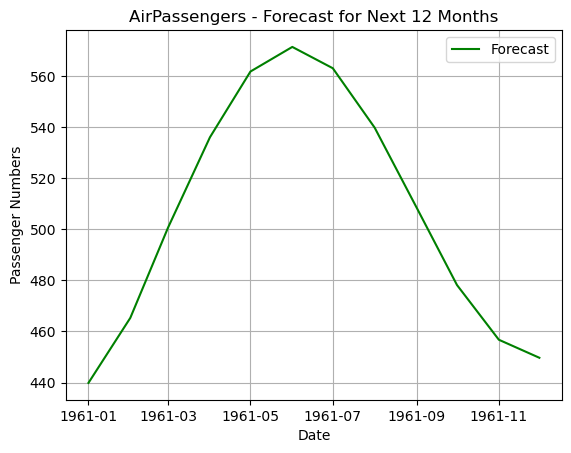

In [14]:
# Plot the forecasted values
plt.plot(forecast, label='Forecast', color='green')
plt.title('AirPassengers - Forecast for Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Passenger Numbers')
plt.legend()
plt.grid(True)
plt.show()